### Linear Regression Assignment -by Maria J Peter


# 1.Load the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


## 2.Load the data

In [6]:
bike=pd.read_csv("day.csv")


## 3.View the data

In [7]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 4.Basic information of data

In [8]:
bike.shape

(730, 16)

In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
bike.duplicated().sum()

0

In [12]:
numerical=[ var for var in bike.columns if bike[var].dtype !="O"]
categorical=[ var for var in bike.columns if bike[var].dtype =="O"]
print('current numerical variables',len(numerical))
print('current categotical variables',len(categorical))

current numerical variables 15
current categotical variables 1


In [13]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [14]:
null=(bike.isnull().sum()/len(bike)*100).sort_values(ascending=False)
null.head(60)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

### Observation

#### a)shape

* 730 rows and 16 columns


#### b)datatypes

* dtypes: float64(4), int64(11), object(1)

* current numerical variables 15
* current categotical variables 1

#### c)negative columns  

* No negative columns

#### d)Duplicates

* No duplicates


#### d)Null Values

* No null values

# 5 Data Preparation

###    5.1 Dropping Columns

In [15]:
drop_columns=["instant","dteday"]   #dropping instant and dteday as first is just numbering and second date is again repeated in other columns

for i in bike.columns:
    if i in drop_columns:
        bike.drop(labels=i,axis=1,inplace=True)
        
bike.head(5)   

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Observations

* Seasons: columns has 4 values representing of 4 seasons.

* yr: Data has exactly 2 years

* mnth:No of months is exactly 12
 
* Holiday:Max is 1 and Min is 0 

* weekday is reperesented as (0-6) sunday is 0

* weathersit:there are 4 condition but only 3 are there in data

* temp,hum,windspeed are continous variables



### 5.2 Transforming Columns Datatype

In [17]:
#categorising columns seasons mnth,weekday,weathersit

bike["season"]=bike["season"].map({1:"spring",2:"Summer",3:"Fall",4:"Winter"})
bike["mnth"]=bike["mnth"].map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
bike["weekday"]=bike["weekday"].map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})
bike["weathersit"]=bike["weathersit"].map({1:"Clear to Partly Cloudy",2:"Misty and Cloudy",3:"Light Rain or Snow",4:"Heavy Rain or Snow"})


In [18]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,1,Misty and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tue,1,Misty and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wed,1,Clear to Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thu,1,Clear to Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Fri,1,Clear to Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# 6.Exploratory Data Analysis

###  6.1 Univariate analysis 

### Target variable

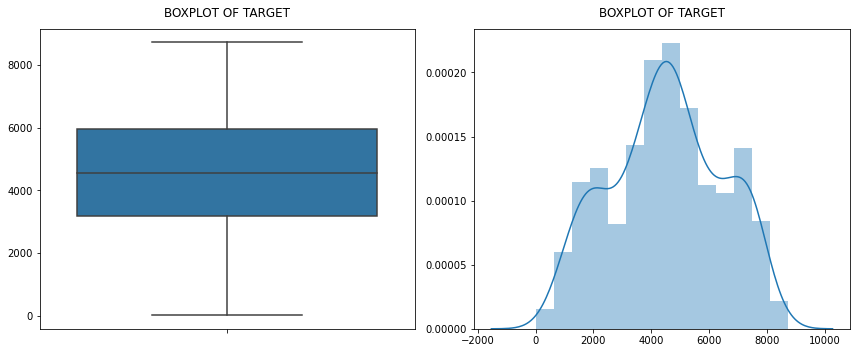

In [19]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,5))


sns.boxplot(y=bike['cnt'],ax=ax[0])
ax[0].set_title("boxplot of target".upper(),fontsize=12,fontweight=20,y=1.02)
ax[0].set_ylabel('')
ax[0].set_xlabel('')

sns.distplot(bike['cnt'],ax=ax[1])
ax[1].set_title("boxplot of target".upper(),fontsize=12,fontweight=20,y=1.02)
ax[1].set_ylabel('')
ax[1].set_xlabel('')


plt.tight_layout()
plt.show()

### Observation

* Target variable shows almost normal distribution with distinct plateus on  both side.

* The median at around 4500 value

### Numerical variables

In [20]:
num_var=[i for i in bike.select_dtypes(exclude="object").columns if bike[i].nunique()>2 and i !='cnt'] #defining the numerical variable list

In [21]:
num_var

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

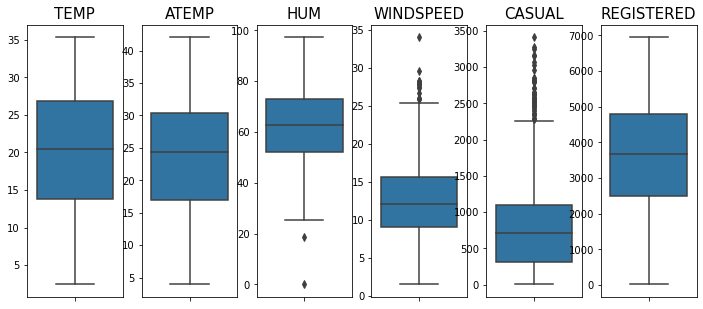

In [22]:
fig,ax=plt.subplots(nrows=1,ncols=len(num_var),figsize=(12,5)) # subplot 

for i in range(len(num_var)):           #Looping for subplot
    sns.boxplot(y=bike[num_var[i]],ax= ax[i])           
    ax[i].set_title(f'{num_var[i].upper()}',fontsize=15)
    ax[i].set_ylabel('')


### Observation

* Humidity .windspeed,casual have outliers

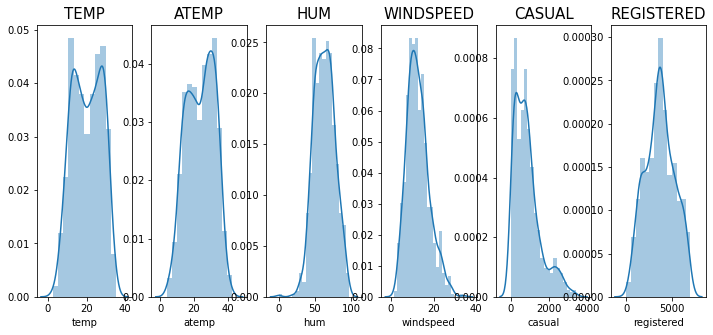

In [23]:
fig,ax=plt.subplots(nrows=1,ncols=len(num_var),figsize=(12,5))  #subplotting

for i in range(len(num_var)):        # Looping for subplotting
    sns.distplot(bike[num_var[i]],ax= ax[i])           
    ax[i].set_title(f'{num_var[i].upper()}',fontsize=15)
    ax[i].set_ylabel('')


### Observation 
* temp and atemp are almost normally distributed with double peak
* Humidity is left skewed 
* Windspeed is right skewed
* Casual is high right skewed
* Registered has similar trend as the target variable


### Categorical Variable 

In [24]:
cat_var=[i for i in bike.select_dtypes(include="object").columns] #checking the categorical variables

In [25]:
cat_var

['season', 'mnth', 'weekday', 'weathersit']

In [26]:
cat_var.extend([i for i in bike .columns if bike[i].nunique()==2])  # Addding the missing categorical variables

In [27]:
cat_var

['season', 'mnth', 'weekday', 'weathersit', 'yr', 'holiday', 'workingday']

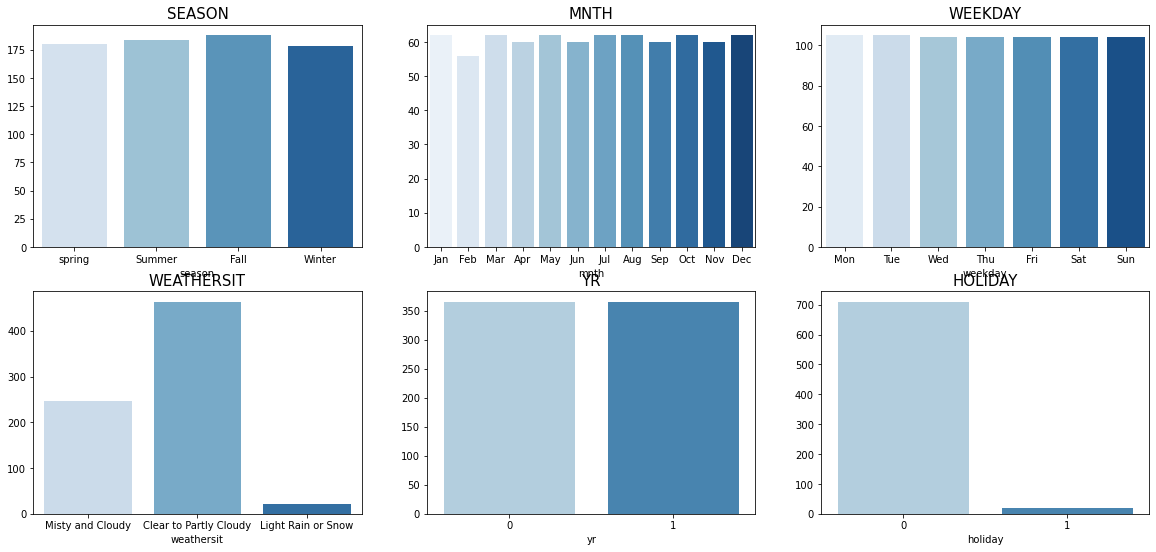

In [28]:
fig,ax=plt.subplots(nrows=2,ncols=int(len(cat_var)/2),figsize=(20,9))
                     # subplotting

k=0
for i in range(2):  # Looping  for subplotting
    for j in range(int(len(cat_var)/2)):
        sns.countplot(bike[cat_var[k]],ax=ax[i,j],palette='Blues')
                 
        
        ax[i,j].set_title(f'{cat_var[k].upper()}',fontsize=15)
        ax[i,j].set_ylabel('')
        ax[i,j].set_ylabel('')
        k+=1
            
plt.show()                     

### Observation

* Fall is the longest season and winter is shortest.

* Weather is mostly clear or partly cloudy.



## 6.2 Bivariant analysis

###  Numeric Variable

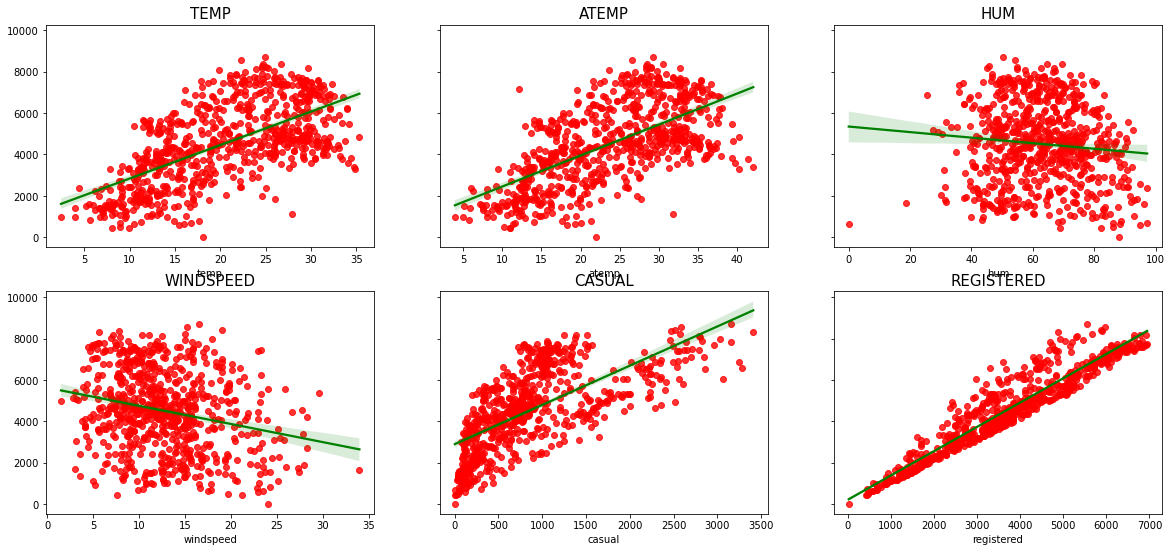

In [29]:
fig,ax=plt.subplots(nrows=2,ncols=int(len(num_var)/2),figsize=(20,9),sharey=True)


k=0
for i in range(2):
    for j in range(int(len(num_var)/2)):
        sns.regplot(x=bike[num_var[k]],y=bike["cnt"], ax= ax[i,j], 
                    scatter_kws={'color':'red'},line_kws={'color':'green'})
        
        ax[i,j].set_title(f'{num_var[k].upper()}',fontsize=15)
        ax[i,j].set_ylabel('')
        ax[i,j].set_ylabel('')
        k+=1
            
plt.show()        


###  Observation

* Bike demand is directly proportional relationship with temp and atemp.

* Bike demand is inversely   proportional  with humidity and windspeed.

* Bike demand is directly proportional to casual and registered.


### Categorical Variables 

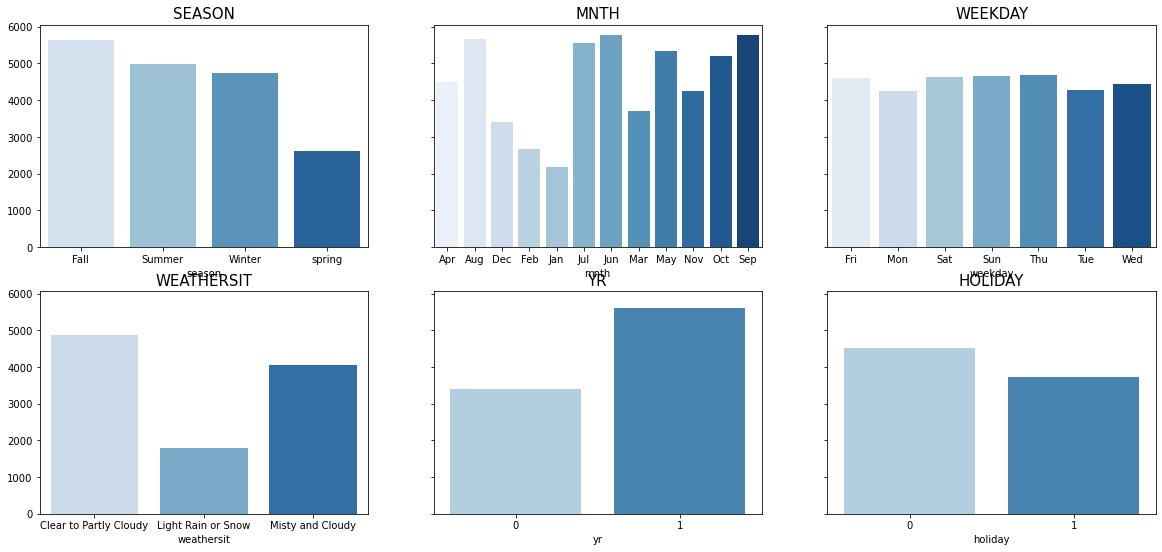

In [30]:
fig,ax=plt.subplots(nrows=2,ncols=int(len(cat_var)/2),figsize=(20,9),sharey=True) # Subplotting 


k=0
for i in range(2):  #Looping for subplotting 
    for j in range(int(len(cat_var)/2)):
        sns.barplot(y=bike.groupby(by= cat_var[k]).mean()['cnt'],
                    x=bike.groupby(by= cat_var[k]).mean().index,ax=ax[i,j],palette="Blues")
        
        ax[i,j].set_title(f'{cat_var[k].upper()}',fontsize=15)
        ax[i,j].set_ylabel('')
        ax[i,j].set_ylabel('')
        k+=1
            
plt.show() 

### Observation 

* Maximum demand is in Fall followed by Summer and winter .

* Months of Aug,Jun,Sep high demand.

* High demand is on days Friday,Saturday,Sunday,Thursday.

* Demand is high when wheather is clear.
 
* Increase in d=business from 2018 to 2019.


### Relation Between all Variables using pairplot

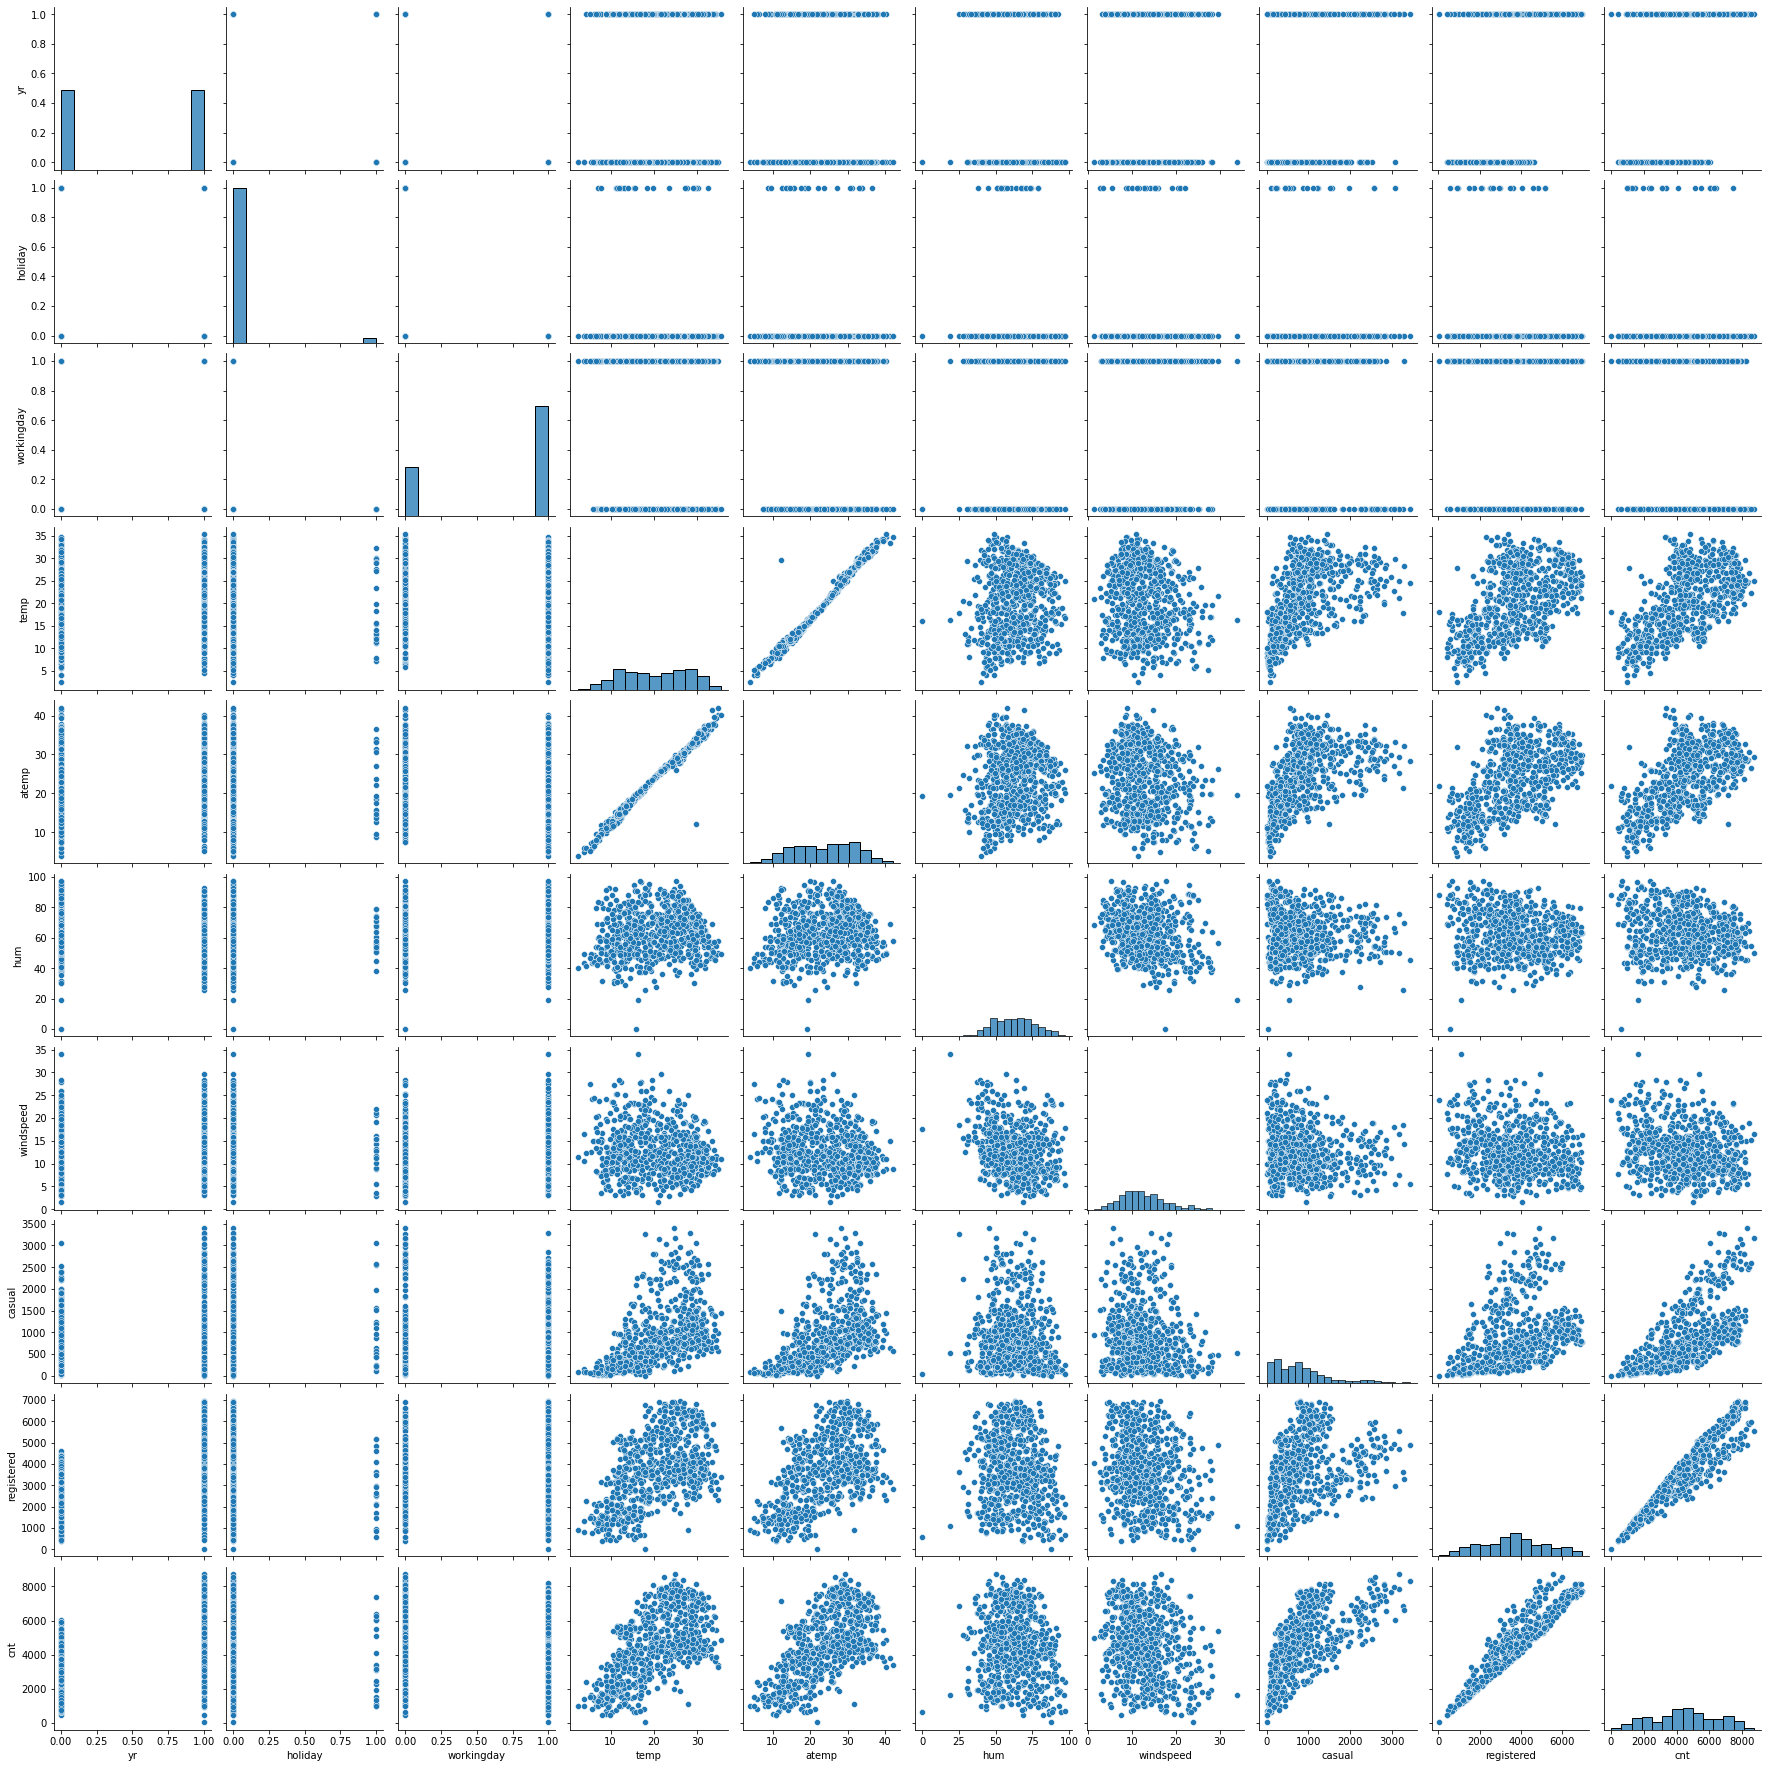

In [31]:
sns.pairplot(bike)

plt.show()

###   Observation

* Target variable is directly proportional to temp,atemp,casual and registered.
* Target variable is  inverse proportional with humidity and windspeed

* Registered is directly proportional with temp,atemp,casual and inversely proportional with humidity and windspeed

Note: Will be dropping Registered and casual as cnt is the summation and can be explained with cnt

In [32]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,1,Misty and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tue,1,Misty and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wed,1,Clear to Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thu,1,Clear to Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Fri,1,Clear to Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [33]:
bike.drop(labels=['casual','registered'],axis=1,inplace=True) #as cnt is the total for casual and registered 

In [34]:
bike.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Misty and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Misty and Cloudy,14.902598,17.68695,69.6087,16.652113,801


### 6.3  Correlation between  Variables using heatmap

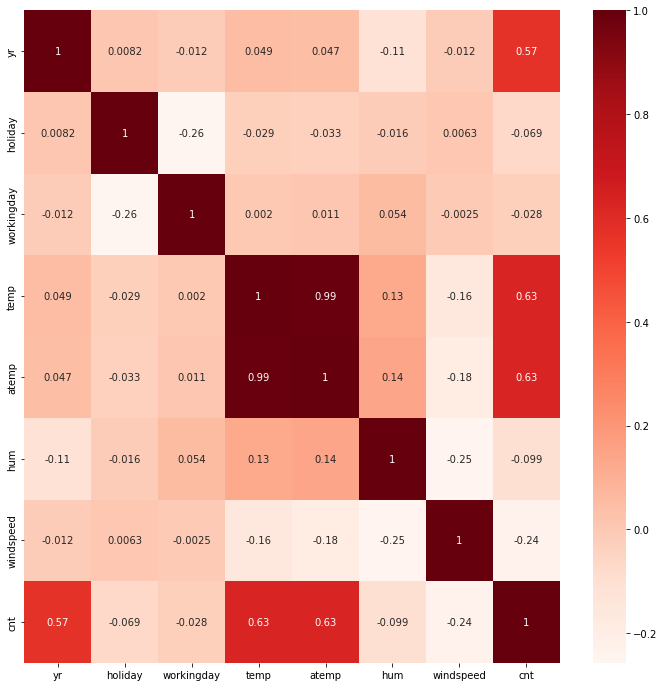

In [35]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(bike.corr(),annot=True,cmap='Reds')
plt.show()

### Observation

* Supports the observations from pairplot

* High correlation btween atemp and temp observed.




# 7.Reasons for Model Development

Machine Learning Problem

* Relation between the target variable found with temp,atemp,humidity and wind speed in pairplots.Since the outcome depends on independent variables and historical records this implies for a Machine Learning problem.


Supervises /Unsupervised

* Target variable is available hence it is Supervised .

Regression

* Target variable is continuous so regression problem.

MultipleFeatures

* Target variable is dependent on many independant variables hence Multi Linear Regression .


# 8 Multiple Linear regression

In [36]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Misty and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Misty and Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear to Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear to Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear to Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


###  Observation

* yr,holiday,workingday are binary

##  8.1 Preparing data for modelling 

* Encoding

* Converting binary vars to 1/0
 
* Other categorical vars to dummy vars
 
* splitting into train and test

* Rescaling of variables

#### 8.1.1  Creating Dummy vriables

In [37]:
bike_ml=bike.copy()

In [38]:
dummy_list=[i for i in bike_ml.select_dtypes(include='object').columns]

for i in dummy_list:
    my_d=pd.get_dummies(data=bike_ml[i],drop_first=True)
    bike_ml=pd.concat([bike_ml,my_d],axis=1).drop(labels=i,axis=1)

In [39]:
bike_ml.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain or Snow,Misty and Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


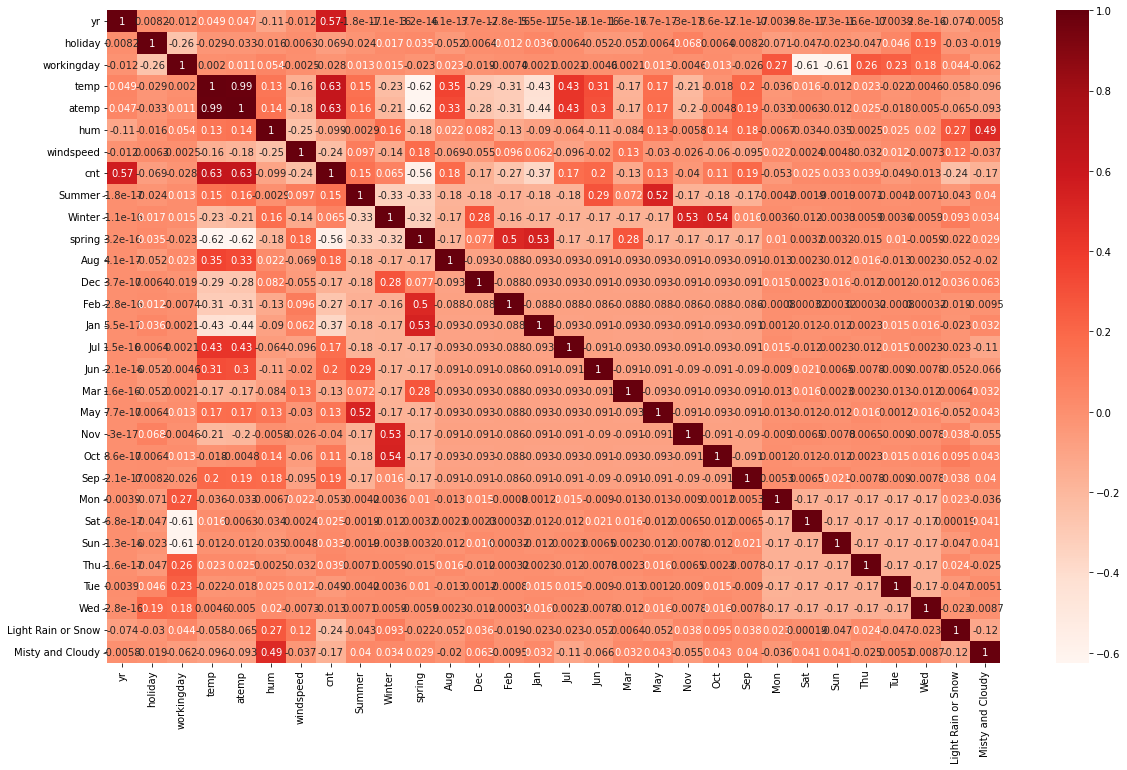

In [40]:
#Heatmap
plt.figure(figsize=(20,12))
sns.heatmap(bike_ml.corr(),annot=True,cmap='Reds')
plt.show()

### Observation 

* Variables with strong positive correlation (above 0.7) with are 
        temp-atemp
        cnt-temp,atemp,yr
        winter-OCt,Nov,
        Spring_Jan,Feb
        Summer _May
        Humidity-Misty and cloudy
        temp-Jul,Aug,Jun
        atemp_Jul,Aug,Jun

* 16 pairs of variables have strong positive correlation 

#### 8.1.2 Splitting into Train and test

In [41]:
df_train,df_test=train_test_split(bike_ml,test_size=0.30,random_state=100)  #70/30
print(df_train.shape)   
print(df_test.shape) # Checking for the total remain same

(511, 30)
(219, 30)


#### 8.1.3  Rescaling 

In [42]:
#Outliers will also be taken care 

scaler=MinMaxScaler()  #instantiate an object

 
v=['temp', 'atemp', 'hum', 'windspeed','cnt']  # list of numeric vars

df_train[v]    # fit on data
df_train[v]  =scaler.fit_transform(df_train[v])  

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain or Snow,Misty and Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,1,0,0,0,0,1


In [43]:
df_train[v].describe()


,temp,atemp,hum,windspeed,cnt
count,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.537386,0.513133,0.650333,0.320844,0.514186
std,0.225640,0.212202,0.145741,0.169639,0.224737
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.341151,0.332910,0.538858,0.199179,0.356765
50%,0.542077,0.529300,0.653499,0.298098,0.519673
75%,0.735215,0.688457,0.754401,0.414438,0.688737
max,1.000000,1.000000,1.000000,1.000000,1.000000


## 8.2 Training the Data

#### 8.2.1 Spliting training dataset in X & y

In [44]:
y_train=df_train.pop("cnt") # X_train ,y_train
X_train=df_train

In [45]:
print(f'X_train shape:{X_train.shape},y_train shape:{y_train.shape}')

X_train shape:(511, 29),y_train shape:(511,)


#  8.3  Model Development

* Automatic Selection using RFE is performed 

* Manual Selection for fine tune by considering P-Value and VIF is done 




### 8.3.1 RFE 

In [46]:
lm=LinearRegression() # Making an Linear Regression

lm.fit(X_train,y_train)  #Fitting Model

rfe=RFE(lm, n_features_to_select=15) # Making rfe on fitted lm
rfe=rfe.fit(X_train,y_train)   # Converting to fitted RFE

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) # Visualising the result 

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('spring', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 5),
 ('Sun', False, 6),
 ('Thu', False, 14),
 ('Tue', False, 7),
 ('Wed', False, 11),
 ('Light Rain or Snow', True, 1),
 ('Misty and Cloudy', True, 1)]

###  Observation

* Top 15 features are retained 

In [48]:
col=X_train.columns[rfe.support_]  # listing the 15 features
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Summer', 'Winter',
       'spring', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light Rain or Snow',
       'Misty and Cloudy'],
      dtype='object')

In [49]:
X_train.columns[~rfe.support_] # non supporting features 

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [50]:
# getting the top 15 features 
rfe_bike=pd.DataFrame()

rfe_bike['Col']=X_train.columns

rfe_bike['RFE_Support']=rfe.support_

rfe_bike=rfe_bike[rfe_bike['RFE_Support']==True]

rfe_bike

,Col,RFE_Support
0,yr,True
1,holiday,True
3,temp,True
5,hum,True
6,windspeed,True
7,Summer,True
8,Winter,True
9,spring,True
11,Dec,True
13,Jan,True


In [51]:
cols=[i for i in rfe_bike['Col']]

X_train[cols].head() # retaining features that are recomended 

,yr,holiday,temp,hum,windspeed,Summer,Winter,spring,Dec,Jan,Jul,Nov,Sep,Light Rain or Snow,Misty and Cloudy
653,1,0,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,1,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,0,0,1,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0,0,1


In [52]:
X_train[cols].shape

(511, 15)

###  Observation

* Final Model has 511 rows and  15 columns.

## 8.3.2 Manuel Model Development

In [53]:
#defining function for VIF

def vif_table(dataframe): 
    
    vif=pd.DataFrame()                    #Starting dataframe

    
    vif["Features"]=dataframe.columns     # Adding feature  
    
    vif["VIF"]=[variance_inflation_factor(dataframe.values,i) for i in range(len(dataframe.columns))]
    
    vif["VIF"]=round(vif['VIF'],2)
    
    vif=vif.sort_values(by="VIF",ascending=False)  # Sorting the dataframe 
    
    return vif


In [54]:
def regmodel_ols(y_dataframe,X_dataframe):
    
    X_dataframe=sm.add_constant( X_dataframe)  #Adding a constant variable
    
    lm=sm.OLS(y_dataframe,X_dataframe).fit()  #Running the linear model
    
    print(lm.summary())
    
    return regmodel_ols
    

In [55]:
X_train_1=X_train[cols]   # Starting Dataframe 

#### OLS 

In [56]:
regmodel_ols(y_train,X_train_1) #Regression Model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     180.1
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          2.29e-189
Time:                        10:47:09   Log-Likelihood:                 514.84
No. Observations:                 511   AIC:                            -997.7
Df Residuals:                     495   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3206      0

<function __main__.regmodel_ols(y_dataframe, X_dataframe)>

### Observations

All P-values are zero except 
Sping,Summer ,December,November,July and January 


####  VIF

In [57]:
vif_table(X_train_1)

,Features,VIF
3,hum,30.93
2,temp,17.82
4,windspeed,4.73
7,spring,4.37
6,Winter,4.06
5,Summer,2.82
14,Misty and Cloudy,2.32
0,yr,2.09
11,Nov,1.83
9,Jan,1.75


###  Observation

VIF of  humidity and temp are very high 



In [58]:
# Dropping hum 
X_train_2=X_train_1.drop(labels='hum',axis=1)


regmodel_ols(y_train,X_train_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.1
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          1.41e-186
Time:                        10:47:11   Log-Likelihood:                 505.44
No. Observations:                 511   AIC:                            -980.9
Df Residuals:                     496   BIC:                            -917.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2457      0

<function __main__.regmodel_ols(y_dataframe, X_dataframe)>

In [59]:
vif_table(X_train_2)

,Features,VIF
2,temp,5.18
3,windspeed,4.67
5,Winter,2.94
6,spring,2.89
4,Summer,2.24
0,yr,2.08
10,Nov,1.80
8,Jan,1.66
9,Jul,1.59
13,Misty and Cloudy,1.56


#### Observation

Temp has VIF higher than 5

Dropping Temp reduces R-Squared so dropping next Summer with next P-value high .

In [60]:
# Dropping Summer
X_train_3=X_train_2.drop(labels='Summer',axis=1)


regmodel_ols(y_train,X_train_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     197.4
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          1.15e-186
Time:                        10:47:12   Log-Likelihood:                 502.90
No. Observations:                 511   AIC:                            -977.8
Df Residuals:                     497   BIC:                            -918.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2902      0

<function __main__.regmodel_ols(y_dataframe, X_dataframe)>

In [61]:
vif_table(X_train_3)

,Features,VIF
2,temp,4.68
3,windspeed,4.05
4,Winter,2.54
5,spring,2.36
0,yr,2.07
9,Nov,1.80
7,Jan,1.65
12,Misty and Cloudy,1.53
6,Dec,1.46
8,Jul,1.36


#### Observation

All VIF are in the limit

## 8.4  Residual Analysis

In [62]:
# Checking if error terms are normally distributed  using histogram 

In [63]:
lm=sm.OLS(y_train,X_train_3).fit()
y_train_pred=lm.predict(X_train_3)  # computing y train predicted values 
res=y_train-y_train_pred   # getting the residuals

Text(0.5, 0, 'Errors')

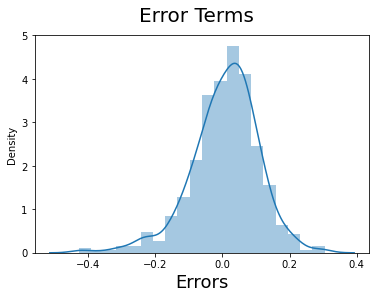

In [64]:
#plotting the error term 

fig=plt.figure()
sns.distplot(res,bins=20)
fig.suptitle("Error Terms", fontsize=20)
plt.xlabel("Errors",fontsize=18)

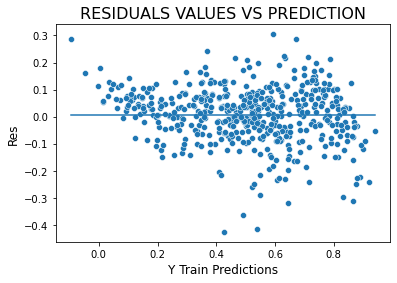

In [65]:
sns.scatterplot(y=res.values,x=y_train_pred.values)
sns.lineplot(y=res.mean(),x=y_train_pred.values)

plt.title('residuals values vs prediction'.upper(),fontsize =16)
plt.ylabel('res'.title(),fontsize=12)
plt.xlabel('y train predictions'.title(),fontsize=12)

plt.show()

### Observation 

* Error is normally distributed 

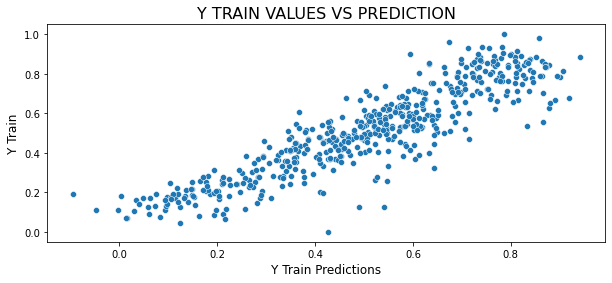

In [66]:
res=y_train-y_train_pred

plt.figure(figsize=(10,4))

sns.scatterplot(y=y_train,x=y_train_pred)

plt.title('y train values vs prediction'.upper(),fontsize =16)
plt.ylabel('y train'.title(),fontsize=12)
plt.xlabel('y train predictions'.title(),fontsize=12)

plt.show()

### Observation

Constant variance of prediction so error validates assumption of Homoscedasticity 

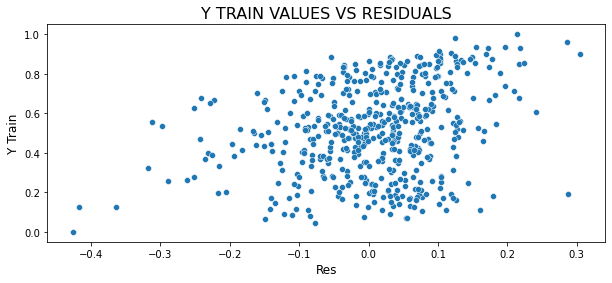

In [67]:
plt.figure(figsize=(10,4))

sns.scatterplot(y=y_train,x=res)

plt.title('y train values vs residuals'.upper(),fontsize =16)
plt.ylabel('y train'.title(),fontsize=12)
plt.xlabel('res'.title(),fontsize=12)

plt.show()

plt.show()

### Observation 

* No correlation among error terms 

# 9  Prediction and Evaluation


In [68]:
# making prediction on test set
# Evaluate the model 

## 9.1 Making Prediction 

#### 9.1.1 Scaling on Test set

In [69]:
df_test.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain or Snow,Misty and Cloudy
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,1,0,...,0,0,0,1,0,0,0,0,0,0


In [70]:
# we use same scaling from the test 
df_test[v]=scaler.transform(df_test[v])  

In [71]:
df_test.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain or Snow,Misty and Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,1,0,0,0,0,0,0


####  9.1.2 Spliting test dataset in X & y

In [72]:
y_test=df_test.pop('cnt')
X_test=df_test

In [73]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Summer,Winter,spring,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain or Snow,Misty and Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,1,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [74]:
print(f'X_test shape:{X_test.shape},y_test shape:{y_test.shape}')

X_test shape:(219, 29),y_test shape:(219,)


#### 9.1.3 Making Actual Prediction



In [75]:
X_test_new=X_test[X_train_3.columns]

In [76]:
y_test_pred=lm.predict(X_test_new)

## 9.2 Evaluating the Prediction

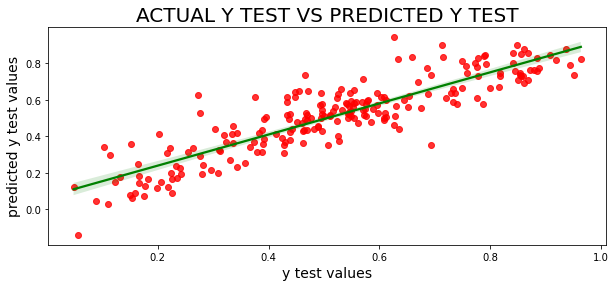

In [77]:
fig=plt.figure(figsize=(10,4))

sns.regplot(x=y_test,y=y_test_pred,scatter_kws={'color':'red'},line_kws={'color':'green'})

plt.title('actual y test vs predicted y test'.upper(),fontsize =20)
plt.xlabel('y test values',fontsize=14)
plt.ylabel('predicted y test values',fontsize=14)


plt.show()


#### Observations:

Y test values and y test predicted values shown strong visual similarities.Most of points display a healthy fit.

#### 9.2.1 Calculating R2 score

In [78]:
print(round(r2_score(y_pred=y_test_pred,y_true=y_test),5))
print(round(r2_score(y_pred=y_train_pred,y_true=y_train),5))


0.774
0.79508


In [79]:
const=0.2902      # From X_tain_3 OLS model 

parameter_series=pd.Series(lm.params)
print(parameter_series)


yr                    0.242305
holiday              -0.091993
temp                  0.731009
windspeed            -0.022111
Winter                0.130119
spring                0.000916
Dec                   0.002160
Jan                   0.003525
Jul                  -0.101461
Nov                  -0.008191
Sep                   0.053733
Light Rain or Snow   -0.277769
Misty and Cloudy     -0.060023
dtype: float64


#### Observation

* Coefficients of Year,Temperature,Winter,Spring,December,January and September are positive

*  Coefficients of Holiday,windspeed,July,November,Light Rain or snow ang Misty and cloudy are negative

* Constant is 0.2902

#### 9.2.3 Model Explanation

* If all variables are kept as 0,demand will be 0.2902.

* If other features remain unchanged, with every change of year demand increases by 0.242 units.

* If other features remain unchanged,demand increases by 0.731 units with temperature.

* If other features remain unchanged,demand increases by 0.13 units in winter .

* If other features remain unchanged,demand increases by 0.001 units in spring.

* If other features remain unchanged,demand decreases by 0.061 units in holidays.

* If other features remain unchanged,demand decreases by 0.022 units with windspeed.

* If other features remain unchanged,demand decreases by 0.277 units with light rain and snow.

* If other features remain unchanged,demand decreases by 0.060 units with misty and cloudy weather .

# 10.Business Recomendation

#Many variables are there so we are considering the top  5 features 

* Major factor is temperature change in temperature demand increases by 0.731.If company can scale up resources for that season it willl boost business.

* Second Most important factor is Light Rain or snow.Demand decreases during Light Rain or snow so company can give some promotions to attract people during Light Rainy days.

* Company can expect a yearly growth around 24% if all other factors remain same and can plan future projects accordlingly.

* During winter there is an increase in demand so taking that into consideration winter months company can increase its capacity.

* July month is having a reduction in the demand it falls among the hotest month hence company can anticipate lesser profit and plan resources accordingly.

